# Estadística Aplicada
## Enfoque Clásico de Series de Tiempo
### Karen Lorelei Cerda Roiz 1945088
#### Sesión 12  16 marzo 2023

En el enfoque clásico de series de tiempo, se considera que la serie de tiene 4 componentes:
1. Tendencia
2. Ciclo
3. Estacional
4. Irregular

Usualmente se considera que la tendencia y el ciclo viven juntos por lo que se habla de la tendencia-ciclo (tendencia)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## Modelo ETS Error-Trend-Seasonally   (Tendencia ciclo estacional irregular)
from statsmodels.tsa.api import seasonal_decompose

In [8]:
pasajeros_avion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [9]:
pasajeros_avion

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
pasajeros_avion = pasajeros_avion.rename(columns={'Thousands of Passengers':'Miles de Pasajeros'})

In [15]:
pasajeros_avion.head()

,Miles de Pasajeros
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
# Cambiar la frecuencia del index
pasajeros_avion.index.freq = 'MS'

In [18]:
pasajeros_avion.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

Text(0.5, 0, 'Año-Mes')

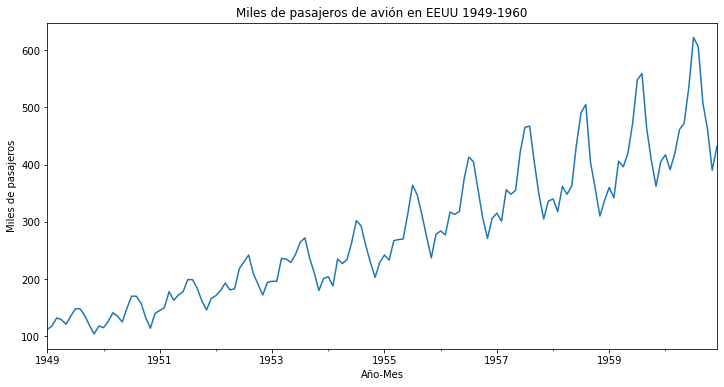

In [24]:
#Para cambiar el tamaño de la gráfica es el figsize=(ancho,alto)
pasajeros_avion['Miles de Pasajeros'].plot(figsize=(12,6))
plt.title('Miles de pasajeros de avión en EEUU 1949-1960')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Año-Mes')

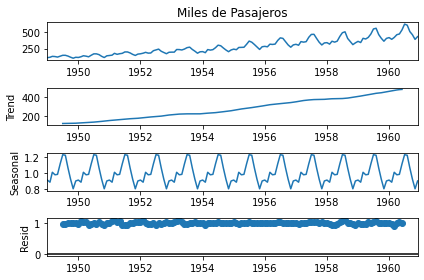

In [32]:
# seasonal_decompose es para ver todas las formas
# es model='multiplicative' o model='Additive' , si no ponemos nada se pone el additive
serie1 = seasonal_decompose(pasajeros_avion['Miles de Pasajeros'], model='multiplicative')
serie1.plot()
plt.show()

In [33]:
## Los numeros significan que los vuelos caen tal % por arriba de lo normal y los positivos que suben tal % por arriba de lo normal
serie1.seasonal.head(12)

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Freq: MS, Name: seasonal, dtype: float64

In [34]:
# desestacionalizar
# quitar el componente estacional
pasajeros_avion['desestacionalizada'] = pasajeros_avion['Miles de Pasajeros']/serie1.seasonal

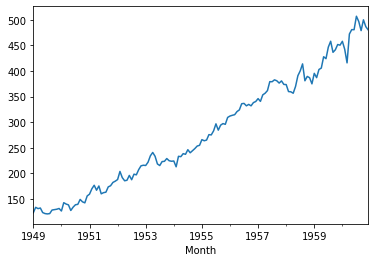

In [35]:
pasajeros_avion['desestacionalizada'].plot();

### COVID 19

In [38]:
confirmados_mex = pd.read_excel('covid_estados.xlsx')

In [39]:
confirmados_mex.head()

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [40]:
#Convertir los datos de la columna fecha en valores de fecha
confirmados_mex['fecha'] = pd.to_datetime(confirmados_mex['fecha'])

In [42]:
confirmados_mex = confirmados_mex.set_index('fecha')

In [45]:
confirmados_mex.index.freq = 'D'

In [46]:
confirmados_mex.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13',
               '2023-03-14', '2023-03-15'],
              dtype='datetime64[ns]', name='fecha', length=1114, freq='D')

(18932.0, 19051.0)

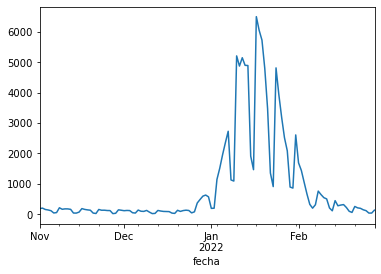

In [51]:
confirmados_mex['nuevo leon'].plot();
plt.xlim('2021-11-01','2022-02-28')

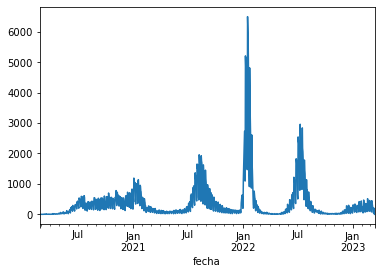

In [52]:
confirmados_mex['nuevo leon'].plot();

In [53]:
seire2 = seasonal_decompose(confirmados_mex['nuevo leon'])

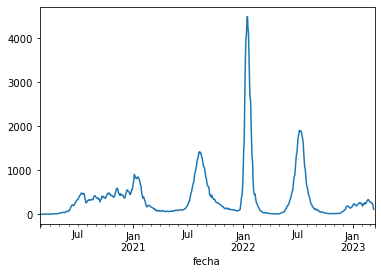

In [54]:
seire2.trend.plot();